# Mental Health Dataset Exploration

## Objective/Context

> The goal of this analysis is to briefly explore the relationships between different variables in the "Mental Health Diagnosis and Treatment Monitoring Data Set". This data set contains information about 500 different patients, with varying mental health diagnoses. It was obtained through Kaggle and was already pre-processed and cleaned. Though this dataset is synthetic, the goal is to practice exploratory data analysis methods, mainly being: data transformation, univariate/bivariate analysis, and inferring sensible insights from the data set. 

## Imports/Reading in Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# Define path (location of csv)
path = "mental_health_diagnosis_treatment_.csv"

# Read csv into dataframe
df = pd.read_csv(path)

## Data Overview/Validation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

> This dataset originally contains 500 entries and 16 different rows. The focus of this analysis will rest on different outcomes based on age, therapy/medication type, and diagnosis for the patient. Being only 500 rows, the data set is on the smaller side- meaning conclusions drawn from this could not be confidently applied to the general population (aside from the fact that it is synthetic). 

In [5]:
df.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

> Due to the synthetic nature of this dataset, there are no empty or duplicated values. This removes the many of the pre-processing methods that are normally required for data sets. Conclusions are much more reliable when drawn from clean and well-maintained data. 

In [7]:
df.describe()

,Patient ID,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,38.708000,7.478000,5.482000,6.472000,5.216000,12.110000,7.542000,7.436000,75.45400
std,144.481833,12.712433,1.706265,1.707486,1.668167,2.829374,2.440864,1.709409,1.725067,9.08697
min,1.000000,18.000000,5.000000,3.000000,4.000000,1.000000,8.000000,5.000000,5.000000,60.00000
25%,125.750000,28.000000,6.000000,4.000000,5.000000,3.000000,10.000000,6.000000,6.000000,67.00000
50%,250.500000,38.000000,8.000000,5.000000,6.000000,5.000000,12.000000,8.000000,7.000000,76.00000
75%,375.250000,50.000000,9.000000,7.000000,8.000000,8.000000,14.000000,9.000000,9.000000,84.00000
max,500.000000,60.000000,10.000000,8.000000,9.000000,10.000000,16.000000,10.000000,10.000000,90.00000


> The average age in this data set ranges from 18-60 years old. The median and the mean for this column are very close in value, meaning the distribution for age is very symmetrical. Variables like 'Symptom Severity', 'Mood Score', and 'Sleep Quality' would be self-rated values. The inherent subjectivity of data like this makes it less reliable than something like "Physical Activity" which contains concrete figures. 

## Data Transformation

### New Column - Age Group

In [8]:
# Define the age bins and their corresponding labels (1-5)
bins = [18, 24, 34, 44, 54, 60]  # Age range bins (18-24, 25-34, 35-44, 45-54, 55-60)
labels = [1, 2, 3, 4, 5]  # Corresponding group numbers

# Use pd.cut to categorize 'Age' into the new age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True, right=True)

> Here, the 'Age Group' column was created. Each patient is placed into one of the following bins: (18-24, 25-34, 35-44, 45-54, 55-60). Each of these age bins could be labeled as the following: "Young Adults, Early Career, Mid Career, Established Professionals, Pre-Retirement". Creating a column like this reduces complexity and helps to create more meaningful graphs. The effects of different diagnoses, therapy types, medication types may affect people of different ages differently.

## Univariate Analysis

#### Age

In [9]:
df['Age'].describe().reset_index()

,index,Age
0,count,500.000000
1,mean,38.708000
2,std,12.712433
3,min,18.000000
4,25%,28.000000
5,50%,38.000000
6,75%,50.000000
7,max,60.000000


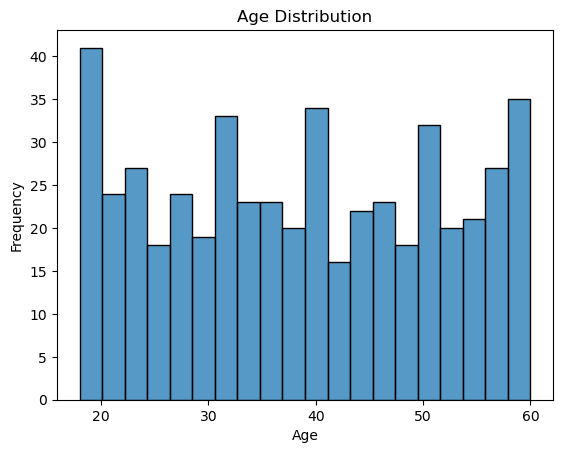

In [10]:
sns.histplot(data=df, x='Age', bins=20 , edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

> The ages in this data set have a generally symmetric distribution. This can be seen in the mean and median values, which are only separated by a difference of around 0.7. This means we can safely apply conclusions to patients of different ages, since neither older or younger patients are over-represented.

#### Sleep Quality

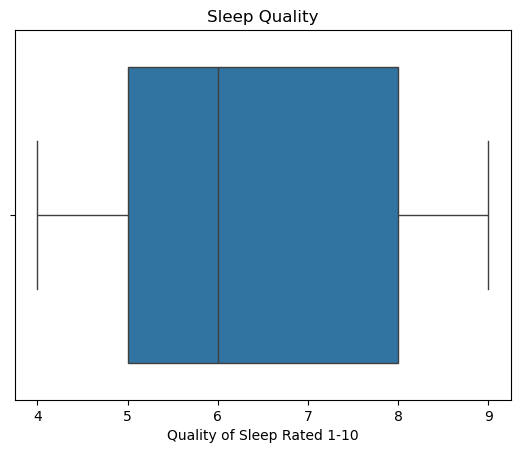

In [11]:
sns.boxplot(data=df, x='Sleep Quality (1-10)', orient = 'y')
plt.title("Sleep Quality")
plt.xlabel("Quality of Sleep Rated 1-10")
plt.show()

> This data set has a median sleep-quality rating of 6, but is skewed-right. This means that the majority of entries are concentrated on the lower end of the scale (closer to a rating of 6), but there are a few (but high) sleep-ratings that skew the box plot and extend the right whisker. 

#### Diagnosis

In [12]:
diagnosis_counts = df['Diagnosis'].value_counts() 
print(diagnosis_counts)

Diagnosis
Generalized Anxiety          135
Major Depressive Disorder    125
Bipolar Disorder             124
Panic Disorder               116
Name: count, dtype: int64


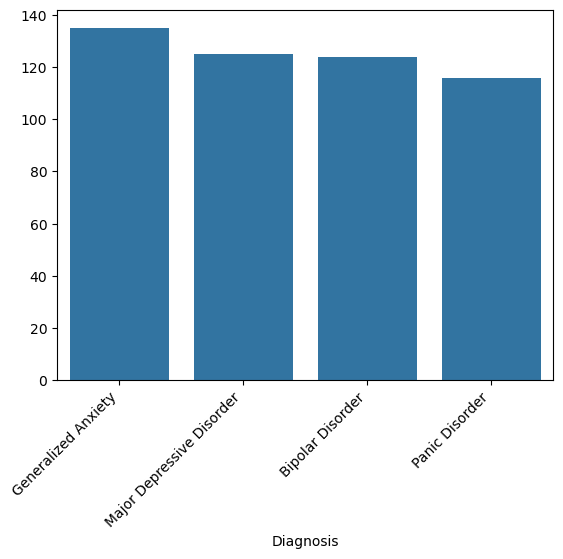

In [13]:
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.xticks(rotation=45, ha="right")
plt.show()

> The diagnosis with the most occurrences would be "Generalized Anxiety", with the least being "Panic Disorder". There is around a 10% difference in between those two values, however this could be due to the smaller size of the dataset (accentuating differences). All of the diagnoses fall within a relatively safe range (but likely do so since the data is synthetic). 

## Bivariate Analysis

#### Graph: Stacked Bar Chart, (Treatment Types = X, and different outcome counts = Y for each bar)

Outcome                         Deteriorated   Improved  No Change
Therapy Type                                                      
Cognitive Behavioral Therapy       28.947368  39.473684  31.578947
Dialectical Behavioral Therapy     31.168831  36.363636  32.467532
Interpersonal Therapy              31.746032  26.984127  41.269841
Mindfulness-Based Therapy          41.025641  34.615385  24.358974


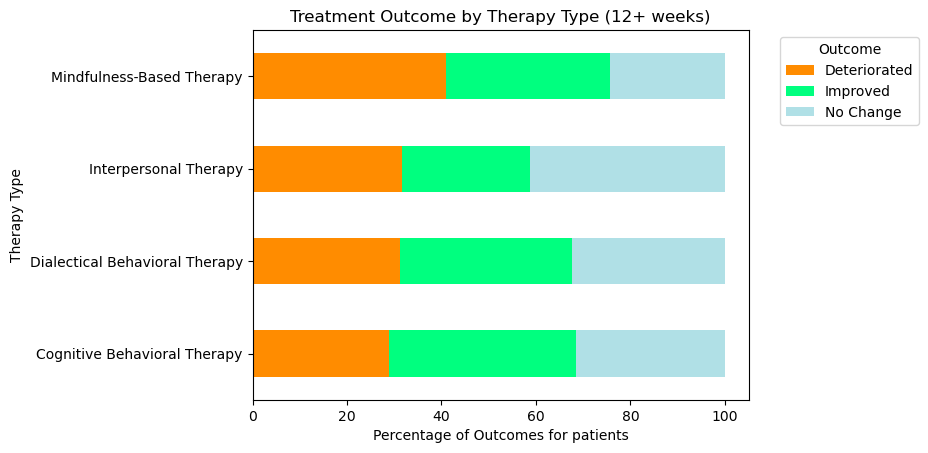

In [14]:
# Group by Therapy Type and Outcome, then count occurrences
tlength_df = df[df['Treatment Duration (weeks)'] >= 12]
sorted_treatments = tlength_df.groupby(["Therapy Type", "Outcome"]).size()

# Unstack to pivot the Outcome values into columns
sorted_treatments = sorted_treatments.unstack(fill_value=0)

# Normalize the data to show percentages instead of counts
sorted_treatments_percentage = sorted_treatments.div(sorted_treatments.sum(axis=1), axis=0) * 100

# Plotting the data as a stacked bar chart (percentages)
ax = sorted_treatments_percentage.plot(kind='barh', stacked=True, color=['darkorange', 'springgreen', 'powderblue'])

# Add labels and title
plt.title('Treatment Outcome by Therapy Type (12+ weeks)')
plt.xlabel('Percentage of Outcomes for patients')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
print(sorted_treatments_percentage)
plt.show()


> For the graph above, patients were divided into groups based on the type of therapy they received for treatment. The dataframe was further filtered to only include entries of 12+ weeks of treatment. This was done to ensure that treatments which took longer to show results wouldn't be overshadowed. 

> Above is a reflection of different patient outcomes, grouped based on the type of therapy the patient went through. It appears that mindfulness-based therapy had the largest percentage of patient's whose condition actually deteriorated (at 41%). The other methods being Interpersonal, Dialetical Behavioral, and Cognitive Behavioral Therapy were closer to 30% of patients who had deteriorated. This however, is only over a timeframe between 12-16 weeks. It is important to note that this method could prove to be more effective over longer periods. 

> Interpersonal Therapy had 73% of patients either deteriorate or show no change, showing the smallest percentage of patients who improved (after 12 weeks). It would be helpful to explore the types of diagnoses/medications associated with this approach for therapy. 

> In contrast, Cognitive Behavioral Therapy had 71% of patients either improve or show no change (with 39% improving). Dialectical Behavioral Therapy was a close second, showing 36% of patients improving and 32% showing no change. These two approaches for patient care appear to be the safest and most effective compared, showing better patient outcomes than Interpersonal Therapy and Mindfulness-Based Therapy. 

Outcome           Deteriorated   Improved  No Change
Medication                                          
Antidepressants      42.105263  30.263158  27.631579
Antipsychotics       34.482759  33.333333  32.183908
Anxiolytics          38.028169  28.169014  33.802817
Benzodiazepines      35.555556  32.222222  32.222222
Mood Stabilizers     28.735632  43.678161  27.586207
SSRIs                28.089888  34.831461  37.078652


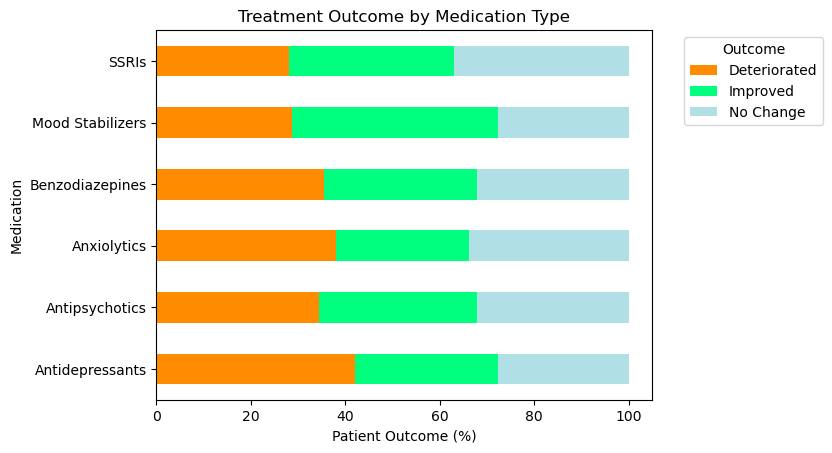

In [15]:
sorted_meds = df.groupby(['Medication', 'Outcome']).size()

sorted_meds= sorted_meds.unstack(fill_value=0)
sorted_medp = sorted_meds.div(sorted_meds.sum(axis=1), axis=0) * 100
print(sorted_medp)

# Plot the result
ax = sorted_medp.plot(kind='barh', stacked=True, color=['darkorange', 'springgreen', 'powderblue'])
plt.title('Treatment Outcome by Medication Type')
plt.xlabel('Patient Outcome (%)')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

> The graph above shows the results of each type of medication. Each medication is used to tackle different mental health diagnoses. While useful, this graph should not be used to compare medications to each other.

> First we can observe the effects of mood stabilizers. Within our test group, 44% of patients saw improvements. This is 9% more the second most effective medication (SSRIs). Seen below, mood stabilizers was most used to treat generalized anxiety and bipolar disorder. 

In [39]:
mood_df = df[(tabilizers')]df['Medication'] == 'Mood S
mood_df.value_counts("Diagnosis")

Diagnosis
Generalized Anxiety          28
Bipolar Disorder             23
Panic Disorder               20
Major Depressive Disorder    16
Name: count, dtype: int64

> Antidepressants saw the worst outcomes, with 42% percent of patients having their condition deteriorate. This means the medication contributed to either the worsening of their current symptoms, decreased their functionality, or developed new symptoms in response to the medication. This effect should be studied. 

In [40]:
mood_df = df[(df['Medication'] == 'Antidepressants')]
mood_df.value_counts("Diagnosis")

Diagnosis
Bipolar Disorder             22
Major Depressive Disorder    21
Generalized Anxiety          19
Panic Disorder               14
Name: count, dtype: int64

#### Graph: 2-3 Box Plots, How a given mental illness affects people of different ages

In [17]:
df['Diagnosis'].unique()

array(['Major Depressive Disorder', 'Panic Disorder',
       'Generalized Anxiety', 'Bipolar Disorder'], dtype=object)

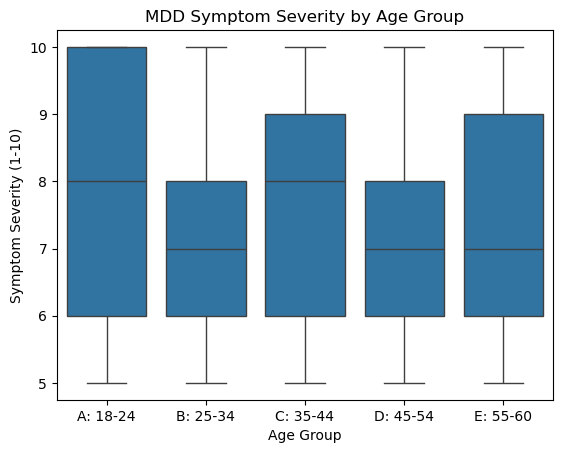

In [54]:
mdd_df = df[df['Diagnosis'] == 'Major Depressive Disorder']
mdd_df = mdd_df[['Age Group', 'Symptom Severity (1-10)']]

sns.boxplot(data=mdd_df, x='Age Group', y='Symptom Severity (1-10)')
plt.title("MDD Symptom Severity by Age Group")
age_groups = ["A: 18-24", "B: 25-34", "C: 35-44", "D: 45-54", "E: 55-60"]
plt.xticks(ticks=range(len(age_groups)),labels = age_groups)
plt.xlabel("Age Group")
plt.ylabel("Symptom Severity (1-10)")
plt.show()

> The graph above shows the severity of symptoms for patients with major depressive disorder across different age groups. Patients in the age group A saw the worst symptoms for MPD. With a median value of 8 and the highest 3rd quartile value, this age group seems to struggle the most. In contrast, age groups B and D saw the lowest median values and tightest iqr spread. Most patients reported a symptom severity rating of 7. Patients in age group E also shared the same median value of 7, but had many more reports of a 9 for symptom severity, slightly worse than groups B & D. 

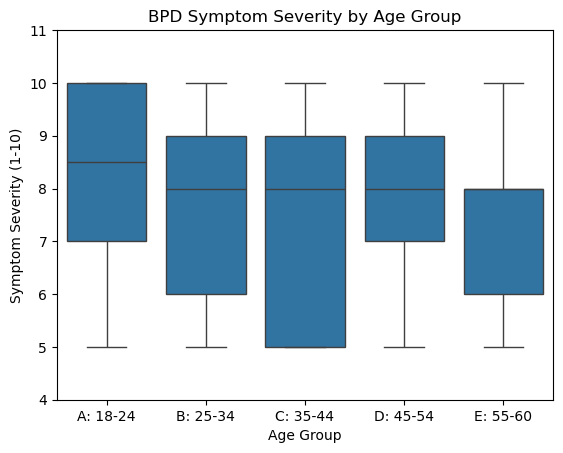

In [57]:
bpd_df = df[df['Diagnosis'] == 'Bipolar Disorder']
bpd_df = bpd_df[['Age Group', 'Symptom Severity (1-10)']]

sns.boxplot(data=bpd_df, x='Age Group', y='Symptom Severity (1-10)')
plt.title("BPD Symptom Severity by Age Group")
age_groups = ["A: 18-24", "B: 25-34", "C: 35-44", "D: 45-54", "E: 55-60"]
plt.xticks(ticks=range(len(age_groups)),labels = age_groups)
plt.xlabel("Age Group")
plt.ylabel("Symptom Severity (1-10)")
plt.ylim(4, 11)
plt.show()

> The graph above shows the effects of BPD on different age groups. Again, symptoms were most severe for group A. With a median value of 8.5 and an 4th quartile value of 10, the effects of this disorder heavily affected this group. Comparatively, group C saw a 1st quartile value of 5, the lowest within the group but had the widest IQR range (5-9). Group D saw moderately bad symtoms, with a tight IQR range around the median value of 8. Most patients within this age group experienced similar severity of symptoms. 

## Conclusions

> This EDA revealed many patterns within interactions between mental health diagnoses, treatments/medications, and patient age. The dataset's synthetic nature limits generalizations that can be made. Despite this, the finding highlight the importance of more personalized treatments as some therapies/medications proved more effective than others. Further analysis might include a deeper analysis into each medication/therapy's and the diagnoses they are used for (to better understand their efficacy). This notebook allowed me to practice many parts of exploratory data analysis, including data transformation, univariate/bivariate analysis, visualizations, and finding insights (and their limitations) from our data. On future projects, I will aim to find more complex data sets (or create my own). 